## Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.cluster import KMeans

%matplotlib inline

/home/admins/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [2]:
iris = datasets.load_iris()

In [3]:
iris_df = pd.DataFrame(data=iris.data,columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
iris_df['flower']=iris.target
print(iris.target_names)
iris_df.head(15)

['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


## Exploratory data analysis

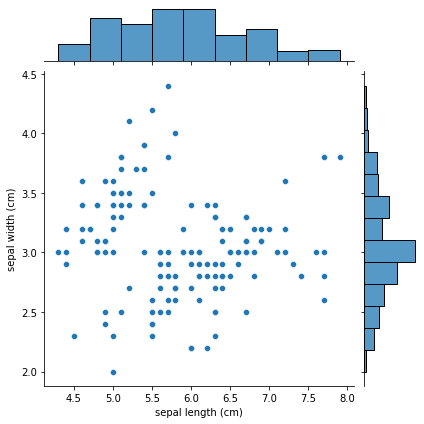

In [5]:
sns.jointplot(data=iris_df, x="sepal length (cm)", y="sepal width (cm)")

<AxesSubplot:xlabel='flower', ylabel='sepal length (cm)'>

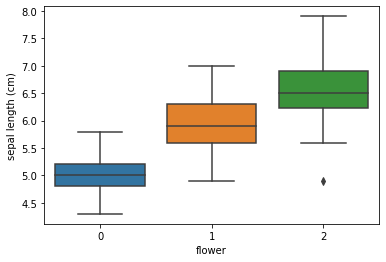

In [6]:
sns.boxplot(x="flower", y="sepal length (cm)", data=iris_df)

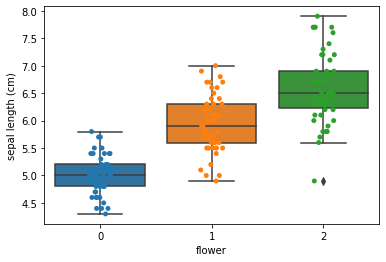

In [7]:
ax = sns.boxplot(x="flower", y="sepal length (cm)", data=iris_df)
ax = sns.stripplot(x="flower", y="sepal length (cm)", data=iris_df, jitter=True, edgecolor="gray")

<AxesSubplot:xlabel='flower', ylabel='sepal length (cm)'>

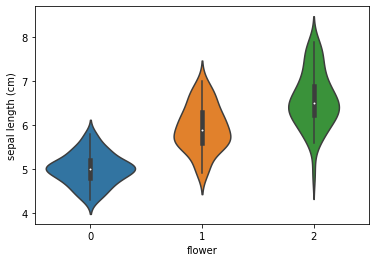

In [8]:
sns.violinplot(x="flower", y="sepal length (cm)", data=iris_df, size=6)

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
X = iris_df[['petal length (cm)','petal width (cm)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:4,:]

array([[-1.34022653, -1.3154443 ],
       [-1.34022653, -1.3154443 ],
       [-1.39706395, -1.3154443 ],
       [-1.2833891 , -1.3154443 ]])

In [11]:
distortions = []

for k in range (1,10):
    kmeanModel = KMeans(n_clusters = k)
    kmeanModel.fit(X_scaled)
    distortions.append(kmeanModel.inertia_)

Text(0.5, 1.0, 'Plotting the variance')

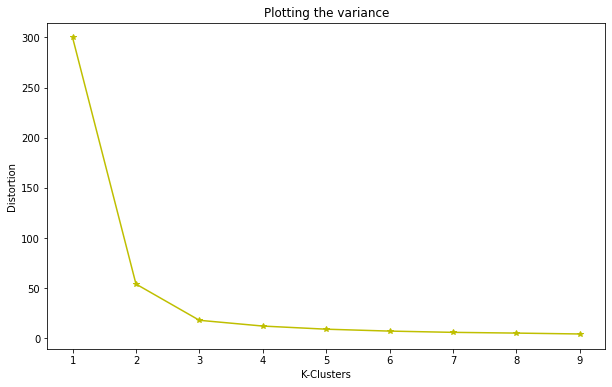

In [12]:
plt.figure(figsize=(10,6))
K = range(1,10)
plt.plot(K, distortions, 'y*-')
plt.xlabel('K-Clusters')
plt.ylabel('Distortion')
plt.title('Plotting the variance')


by observing the elbow chart graph, number of clusters = 3 is optimal solution for this case. now training our model with n_clusters = 3

In [13]:
km = KMeans(n_clusters = 3 )
predicted = km.fit_predict(iris_df)
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [14]:
iris_df['cluster'] = predicted
iris_df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower,cluster
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0


In [15]:
iris_df.cluster.unique()

array([0, 1, 2], dtype=int32)

In [16]:
d1 = iris_df[iris_df.cluster==0]
d2 = iris_df[iris_df.cluster==1]
d3 = iris_df[iris_df.cluster==2]

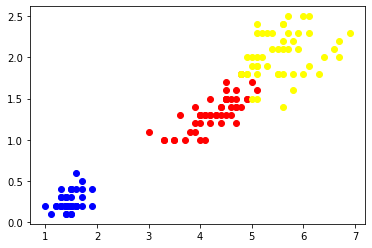

In [17]:
plt.scatter(d1['petal length (cm)'],d1['petal width (cm)'], color='blue')
plt.scatter(d2['petal length (cm)'],d2['petal width (cm)'], color='red')
plt.scatter(d3['petal length (cm)'],d3['petal width (cm)'], color='yellow')

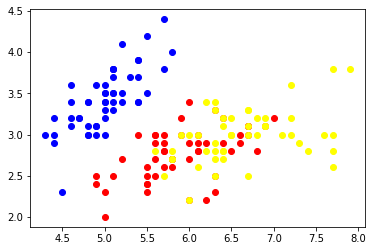

In [18]:
plt.scatter(d1['sepal length (cm)'],d1['sepal width (cm)'], color='blue')
plt.scatter(d2['sepal length (cm)'],d2['sepal width (cm)'], color='red')
plt.scatter(d3['sepal length (cm)'],d3['sepal width (cm)'], color='yellow')